link to this notebook: https://shorturl.at/kwvJ2

link to the dataset: https://shorturl.at/uqdUy

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("loan_approval_dataset.csv")

In [ ]:
df

,loan_id,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,bank_asset_value,loan_status
0,1,9600000,29900000,12,778,2400000,8000000,Approved
1,2,4100000,12200000,8,417,2700000,3300000,Rejected
2,3,9100000,29700000,20,506,7100000,12800000,Rejected
3,4,8200000,30700000,8,467,18200000,7900000,Rejected
4,5,9800000,24200000,20,382,12400000,5000000,Rejected
...,...,...,...,...,...,...,...,...
4264,4265,1000000,2300000,12,317,2800000,800000,Rejected
4265,4266,3300000,11300000,20,559,4200000,1900000,Approved
4266,4267,6500000,23900000,18,457,1200000,7300000,Rejected
4267,4268,4100000,12800000,8,780,8200000,5800000,Approved


In [ ]:
x=df.drop(columns=['loan_id','loan_status'])

In [ ]:
y=df.loan_status

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
models = {
    "Logistic_Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision_Tree": DecisionTreeClassifier(max_depth=3),
    "SVM": SVC(probability=True),  # Enable probability for SVM
    "Random_Forest": RandomForestClassifier(max_depth=3)
}

NameError: name 'LogisticRegression' is not defined

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [ ]:
models['Logistic_Regression'].fit(X_train, y_train)
y_pred = models['Logistic_Regression'].predict(X_test)

f1 = f1_score(y_test, y_pred, pos_label=" Approved")
precision = precision_score(y_test, y_pred, pos_label=" Approved")
recall = recall_score(y_test, y_pred, pos_label=" Approved")
print("Logistic Regression")
print(f"F1 Score: {f1}, Precision: {precision}, Recall: {recall}")

Logistic Regression
F1 Score: 0.8464874241110147, Precision: 0.7909238249594813, Recall: 0.9104477611940298


In [ ]:
models['KNN'].fit(X_train, y_train)
y_pred = models['KNN'].predict(X_test)

f1 = f1_score(y_test, y_pred, pos_label=" Approved")
precision = precision_score(y_test, y_pred, pos_label=" Approved")
recall = recall_score(y_test, y_pred, pos_label=" Approved")
print("KNN")
print(f"F1 Score: {f1}, Precision: {precision}, Recall: {recall}")

KNN
F1 Score: 0.6648888888888889, Precision: 0.634974533106961, Recall: 0.6977611940298507


In [ ]:
models['Decision_Tree'].fit(X_train, y_train)
y_pred = models['Decision_Tree'].predict(X_test)

f1 = f1_score(y_test, y_pred, pos_label=" Approved")
precision = precision_score(y_test, y_pred, pos_label=" Approved")
recall = recall_score(y_test, y_pred, pos_label=" Approved")
print("Decision Tree")
print(f"F1 Score: {f1}, Precision: {precision}, Recall: {recall}")

Decision Tree
F1 Score: 0.9703915950334289, Precision: 0.9941291585127201, Recall: 0.9477611940298507


In [ ]:
models['SVM'].fit(X_train, y_train)
y_pred = models['SVM'].predict(X_test)

f1 = f1_score(y_test, y_pred, pos_label=" Approved")
precision = precision_score(y_test, y_pred, pos_label=" Approved")
recall = recall_score(y_test, y_pred, pos_label=" Approved")
print("SVM")
print(f"F1 Score: {f1}, Precision: {precision}, Recall: {recall}")

SVM
F1 Score: 0.7712230215827338, Precision: 0.6276346604215457, Recall: 1.0


In [ ]:
models['Random_Forest'].fit(X_train, y_train)
y_pred = models['Random_Forest'].predict(X_test)

f1 = f1_score(y_test, y_pred, pos_label=" Approved")
precision = precision_score(y_test, y_pred, pos_label=" Approved")
recall = recall_score(y_test, y_pred, pos_label=" Approved")
print("Random Forrest")
print(f"F1 Score: {f1}, Precision: {precision}, Recall: {recall}")

Random Forrest
F1 Score: 0.9686013320647003, Precision: 0.9883495145631068, Recall: 0.9496268656716418


In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_model = VotingClassifier(
   estimators=[
        ("Logistic_Regressi1on", LogisticRegression()),
        ("KNN", KNeighborsClassifier()),
        ("Decision_Tree", DecisionTreeClassifier(max_depth=3)),
    ],
    voting='soft'
)

In [ ]:
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic_Regressi1on', LogisticRegression()),
                             ('KNN', KNeighborsClassifier()),
                             ('Decision_Tree',
                              DecisionTreeClassifier(max_depth=3))],
                 voting='soft')

In [ ]:
y_pred = ensemble_model.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("ensemble")
print(f"F1 Score: {f1}, Precision: {precision}, Recall: {recall}")

ensemble
F1 Score: 0.9284489039782824, Precision: 0.933261334785731, Recall: 0.9297423887587822


In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_model2 = VotingClassifier(
   estimators=[

        ("SVM", SVC(probability=True)),
        ("Random_Forest", RandomForestClassifier(max_depth=3))
    ],
    voting='soft'
)

In [ ]:
ensemble_model2.fit(X_train, y_train)

VotingClassifier(estimators=[('SVM', SVC(probability=True)),
                             ('Random_Forest',
                              RandomForestClassifier(max_depth=3))],
                 voting='soft')

In [ ]:
y_pred = ensemble_model2.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("ensemble")
print(f"F1 Score: {f1}, Precision: {precision}, Recall: {recall}")

ensemble
F1 Score: 0.9584709161876631, Precision: 0.9615285234417617, Recall: 0.9590163934426229


In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_model3 = VotingClassifier(
   estimators=[
        ("Logistic_Regression", LogisticRegression()),
        ("KNN", KNeighborsClassifier()),
        ("Decision_Tree", DecisionTreeClassifier(max_depth=3)),
       ("SVM", SVC(probability=True)),
        ("Random_Forest", RandomForestClassifier(max_depth=3))
    ],
    voting='soft'
)

In [ ]:
ensemble_model3.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic_Regression', LogisticRegression()),
                             ('KNN', KNeighborsClassifier()),
                             ('Decision_Tree',
                              DecisionTreeClassifier(max_depth=3)),
                             ('SVM', SVC(probability=True)),
                             ('Random_Forest',
                              RandomForestClassifier(max_depth=3))],
                 voting='soft')

In [ ]:
y_pred = ensemble_model2.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("ensemble")
print(f"F1 Score: {f1}, Precision: {precision}, Recall: {recall}")

ensemble
F1 Score: 0.9584709161876631, Precision: 0.9615285234417617, Recall: 0.9590163934426229


# Random Forest

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings. filterwarnings('ignore')
# Load the Wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  #Target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=5, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Accuracy Comparison
print("\nAccuracy Scores:")
print(f"Logistic Regression: {accuracy_score(y_test, lr_pred):.2f}")
print(f"Decision Tree: {accuracy_score(y_test, dt_pred):.2f}")
print(f"Random Forest: {accuracy_score(y_test, rf_pred):.2f}")



Accuracy Scores:
Logistic Regression: 0.98
Decision Tree: 0.96
Random Forest: 1.00


Test Accuracy: 1.00
OOB Score: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54


Feature Importance:
color_intensity                 0.180198
flavanoids                      0.165947
alcohol                         0.142041
proline                         0.126080
od280/od315_of_diluted_wines    0.096032
hue                             0.085966
total_phenols                   0.059758
magnesium                       0.034673
alcalinity_of_ash               0.033211
proanthocyanins                 0.029778
malic_acid                      0.028976
ash                             0.011859
nonflavanoid_phenols            0.005480
dtype

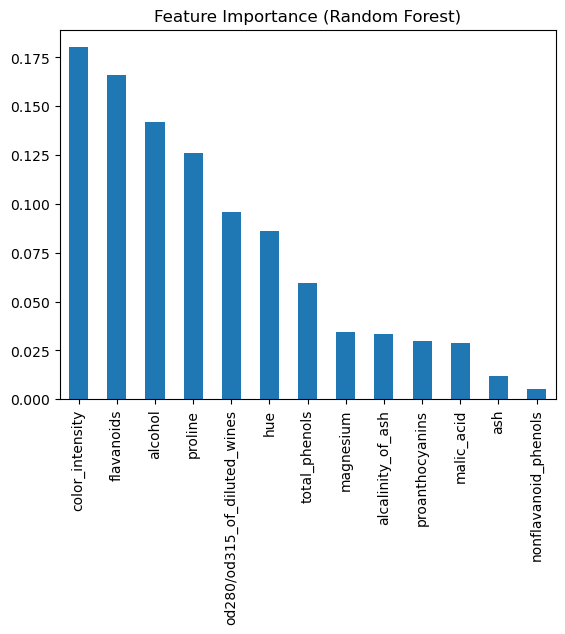

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest with OOB Score
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X_train, y_train)

# Predictions and Accuracy
y_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# OOB Score
oob_score = rf.oob_score_

print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"OOB Score: {oob_score:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance
import pandas as pd
feature_importance = pd.Series(rf.feature_importances_, index=wine.feature_names).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# Plot Feature Importance
feature_importance.plot(kind='bar', title="Feature Importance (Random Forest)")
plt.show()


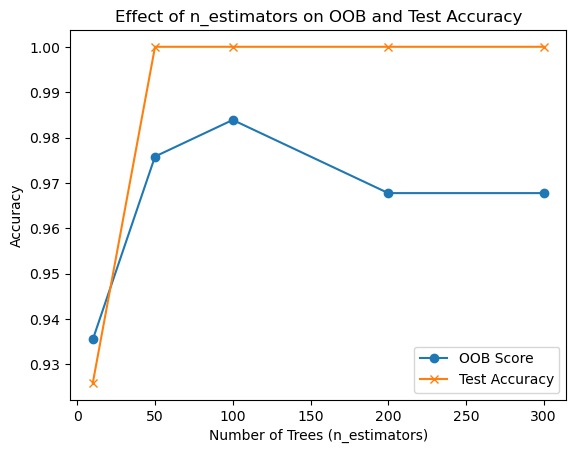

In [ ]:
# changing hyperparameters
n_estimators_range = [10, 50, 100, 200, 300]
oob_scores = []
test_accuracies = []

for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, oob_score=True, random_state=42)
    rf.fit(X_train, y_train)
    oob_scores.append(rf.oob_score_)
    y_pred = rf.predict(X_test)
    test_accuracies.append(accuracy_score(y_test, y_pred))

# Plotting Results
plt.plot(n_estimators_range, oob_scores, label='OOB Score', marker='o')
plt.plot(n_estimators_range, test_accuracies, label='Test Accuracy', marker='x')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Effect of n_estimators on OOB and Test Accuracy')
plt.legend()
plt.show()
